<a href="https://colab.research.google.com/github/DataMinati/Super-Notebooks-1K/blob/main/Laptop_EDA_and_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/laptop_price.csv', encoding="ISO-8859-1")
df.head(10)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1158.70
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.00


In [3]:
r,c = df.shape
print("Number of Laptop data = ",r)
print("Number of Parameters  = ",c)

Number of Laptop data =  1303
Number of Parameters  =  13


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
laptop_ID,1303.0,660.155794,381.172104,1.0,331.5,659.0,990.50,1320.0
Inches,1303.0,15.017191,1.426304,10.1,14.0,15.6,15.60,18.4
Price_euros,1303.0,1123.686992,699.009043,174.0,599.0,977.0,1487.88,6099.0


In [7]:
df = df.rename(columns=str.lower)

In [8]:
df.columns

Index(['laptop_id', 'company', 'product', 'typename', 'inches',
       'screenresolution', 'cpu', 'ram', 'memory', 'gpu', 'opsys', 'weight',
       'price_euros'],
      dtype='object')

In [9]:
df = df.rename(columns={'price_euros':'price'})

In [14]:
df=df.drop('laptop_id', axis=1)

In [15]:
df['screenresolution']

0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: screenresolution, Length: 1303, dtype: object

In [16]:
df['resolution'] = df['screenresolution'].str.extract(r'(\d+x\d+)')
df['screentype'] = df['screenresolution'].replace(r'(\d+x\d+)','',regex=True)
df['screentype'] = df['screentype'].replace(r'(Full HD|Quad HD|Quad HD|\+|/|4K Ultra HD)','',regex=True)
df['screentype']

0       IPS Panel Retina Display 
1                                
2                                
3       IPS Panel Retina Display 
4       IPS Panel Retina Display 
                  ...            
1298     IPS Panel   Touchscreen 
1299     IPS Panel   Touchscreen 
1300                             
1301                             
1302                             
Name: screentype, Length: 1303, dtype: object

In [17]:
df['touchscreen'] = df['screentype'].str.extract(r'(Touchscreen)')
df['screentype'] = df['screentype'].replace(r'(Touchscreen)','',regex=True)
df['touchscreen'].value_counts()

Touchscreen    192
Name: touchscreen, dtype: int64

In [18]:
df['touchscreen'] = df['touchscreen'].replace('Touchscreen',1)
df['touchscreen'] = df['touchscreen'].replace(np.nan,0)
df['touchscreen'].value_counts()

0.0    1111
1.0     192
Name: touchscreen, dtype: int64

In [19]:
df['screentype'].value_counts()

                             549
                             314
IPS Panel                    265
                              75
IPS Panel                     72
IPS Panel Retina Display      17
IPS Panel                     11
Name: screentype, dtype: int64

In [20]:
df['screentype']=df['screentype'].replace(r' ','',regex=True)
df['screentype'].value_counts()

                         938
IPSPanel                 348
IPSPanelRetinaDisplay     17
Name: screentype, dtype: int64

In [21]:
df['screentype'] = df['screentype'].replace(r'^\s*$', np.nan, regex=True)
df['screentype'].value_counts()

IPSPanel                 348
IPSPanelRetinaDisplay     17
Name: screentype, dtype: int64

In [22]:
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,resolution,screentype,touchscreen
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0.0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0.0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0


In [23]:
df = df.drop('screenresolution', axis=1)
df.head()

,company,product,typename,inches,cpu,ram,memory,gpu,opsys,weight,price,resolution,screentype,touchscreen
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0.0
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0.0
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0


In [24]:
df['resolution'].value_counts()

1920x1080    841
1366x768     308
3840x2160     43
3200x1800     27
2560x1440     23
1600x900      23
2256x1504      6
2560x1600      6
2304x1440      6
1920x1200      5
2400x1600      4
2880x1800      4
1440x900       4
2160x1440      2
2736x1824      1
Name: resolution, dtype: int64

In [25]:
df['screentype'].value_counts()

IPSPanel                 348
IPSPanelRetinaDisplay     17
Name: screentype, dtype: int64

In [26]:
df['touchscreen'].value_counts()

0.0    1111
1.0     192
Name: touchscreen, dtype: int64

In [27]:
df['cpu']

0                       Intel Core i5 2.3GHz
1                       Intel Core i5 1.8GHz
2                 Intel Core i5 7200U 2.5GHz
3                       Intel Core i7 2.7GHz
4                       Intel Core i5 3.1GHz
                        ...                 
1298              Intel Core i7 6500U 2.5GHz
1299              Intel Core i7 6500U 2.5GHz
1300    Intel Celeron Dual Core N3050 1.6GHz
1301              Intel Core i7 6500U 2.5GHz
1302    Intel Celeron Dual Core N3050 1.6GHz
Name: cpu, Length: 1303, dtype: object

In [28]:
df['cpu_freq'] = df['cpu'].str.extract(r'(\d+(?:\.\d+)?GHz)') 
df['cpu_freq'].value_counts()

2.5GHz     290
2.8GHz     165
2.7GHz     165
1.6GHz     133
2.3GHz      86
1.8GHz      78
2.6GHz      76
2GHz        67
1.1GHz      53
2.4GHz      52
2.9GHz      21
2.0GHz      19
3GHz        19
1.2GHz      15
1.44GHz     12
2.2GHz      11
1.5GHz      10
1.3GHz       6
3.6GHz       5
0.9GHz       4
2.50GHz      3
3.1GHz       3
2.1GHz       3
1.9GHz       2
2.70GHz      1
1.60GHz      1
1.0GHz       1
3.2GHz       1
1.92GHz      1
Name: cpu_freq, dtype: int64

In [30]:
df['cpu_freq'] = df['cpu_freq'].str.replace('GHz', '')
df.rename(columns={'cpu_freq': 'cpu_freq(GHz)'}, inplace=True)
df['cpu_freq(GHz)'] = df['cpu_freq(GHz)'].astype(float)
df['cpu']= df['cpu'].str.replace(r'(\d+(?:\.\d+)?GHz)', '', regex=True)
df.head()

,company,product,typename,inches,cpu,ram,memory,gpu,opsys,weight,price,resolution,screentype,touchscreen,cpu_freq(GHz)
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0.0,1.8
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0.0,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1


In [31]:
df['ram'] = df['ram'].str.replace('GB', '')
df.rename(columns={'ram': 'ram(GB)'}, inplace=True)
df['ram(GB)'] = df['ram(GB)'].astype(int)
df.head()

,company,product,typename,inches,cpu,ram(GB),memory,gpu,opsys,weight,price,resolution,screentype,touchscreen,cpu_freq(GHz)
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0.0,1.8
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0.0,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1


In [32]:
df['memory']

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1298              128GB SSD
1299              512GB SSD
1300     64GB Flash Storage
1301                1TB HDD
1302              500GB HDD
Name: memory, Length: 1303, dtype: object

In [33]:
df['memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
256GB SSD +  500GB HDD             2
1TB SSD +  1TB HDD                 2
508GB Hybrid                       1
6

In [34]:
df['memory_1']=df['memory']
df['memory_1']=df['memory_1'].str.replace('1.0TB','1TB', regex=True)
df['memory_1']=df['memory_1'].str.replace('1TB','1000GB')
df['memory_1']=df['memory_1'].str.replace('2TB','2000GB')
df['memory_1']=df['memory_1'].str.replace('GB','')
df['memory_1'].value_counts()

256 SSD                         412
1000 HDD                        224
500 HDD                         132
512 SSD                         118
128 SSD +  1000 HDD              94
128 SSD                          76
256 SSD +  1000 HDD              73
32 Flash Storage                 38
2000 HDD                         16
64 Flash Storage                 15
512 SSD +  1000 HDD              14
1000 SSD                         14
256 SSD +  2000 HDD              10
1000 Hybrid                       9
256 Flash Storage                 8
16 Flash Storage                  7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
1000 SSD +  1000 HDD              2
512 Flash Storage                 2
256 SSD +  256 SSD                2
256 SSD +  500 HDD                2
128 SSD +  2000 HDD               2
32 HDD                            1
256 SSD +  1000 Hybrid      

In [35]:
df['memory2']=df['memory_1'].str.replace(r' ','')
df['memory2'].value_counts()

256SSD                    412
1000HDD                   224
500HDD                    132
512SSD                    118
128SSD+1000HDD             94
128SSD                     76
256SSD+1000HDD             73
32FlashStorage             38
2000HDD                    16
64FlashStorage             15
1000SSD                    14
512SSD+1000HDD             14
256SSD+2000HDD             10
1000Hybrid                  9
256FlashStorage             8
16FlashStorage              7
32SSD                       6
180SSD                      5
128FlashStorage             4
512SSD+2000HDD              3
16SSD                       3
256SSD+500HDD               2
128SSD+2000HDD              2
512FlashStorage             2
1000SSD+1000HDD             2
256SSD+256SSD               2
1000HDD+1000HDD             1
240SSD                      1
8SSD                        1
512SSD+1000Hybrid           1
512SSD+512SSD               1
512SSD+256SSD               1
64SSD                       1
256SSD+100

In [36]:
import regex as re
memory_1=[]
memory_2=[]
for i in df['memory2']:
    if len(re.findall(r'\+',i))==1: # DOUBLE DRIVE
        one=re.findall(r'(\w+)',i)
        memory_1.append(one[0])
        memory_2.append(one[1])
    else: # SINGLE DRIVE
        one=re.findall(r'(\w+)',i)
        memory_1.append(one[0])
        memory_2.append('NaN')

In [37]:
memory_1_gb=[]
memory_1_type=[]
for i in memory_1:
    memory_1_type.append(re.findall(r'(\D\w+)',i)[0])
    memory_1_gb.append(re.findall(r'(\d+)',i)[0])

In [38]:
memory_2_gb=[]
memory_2_type=[]
for i in memory_2:
    if i != 'NaN':
        memory_2_type.append(re.findall(r'(\D\w+)',i)[0])
        memory_2_gb.append(re.findall(r'(\d+)',i)[0])
    else:
        memory_2_type.append('NaN')
        memory_2_gb.append(0)

In [39]:
df['memory_1_sto(GB)'] = memory_1_gb
df['memory_1_type'] = memory_1_type
df['memory_2_sto(GB)'] = memory_2_gb
df['memory_2_type'] = memory_2_type

In [40]:
df['memory_1_sto(GB)'] = df['memory_1_sto(GB)'].astype(float)
df['memory_2_sto(GB)'] = df['memory_2_sto(GB)'].astype(float)
df.head()

,company,product,typename,inches,cpu,ram(GB),memory,gpu,opsys,weight,price,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1,memory2,memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,128 SSD,128SSD,128.0,SSD,0.0,NaN
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0.0,1.8,128 Flash Storage,128FlashStorage,128.0,FlashStorage,0.0,NaN
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0.0,2.5,256 SSD,256SSD,256.0,SSD,0.0,NaN
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,512 SSD,512SSD,512.0,SSD,0.0,NaN
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,256 SSD,256SSD,256.0,SSD,0.0,NaN


In [41]:
df=df.drop(['memory_1','memory2','memory'], axis=1)
df = df.replace({'NaN': np.nan})
df.head()

,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight,price,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,128.0,SSD,0.0,NaN
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0.0,1.8,128.0,FlashStorage,0.0,NaN
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0.0,2.5,256.0,SSD,0.0,NaN
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,512.0,SSD,0.0,NaN
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,256.0,SSD,0.0,NaN


In [42]:
df['weight'].value_counts()

2.2kg      121
2.1kg       58
2.4kg       44
2.3kg       41
2.5kg       38
          ... 
2.591kg      1
3.8kg        1
1.70kg       1
1.19kg       1
4.5kg        1
Name: weight, Length: 179, dtype: int64

In [43]:
df['weight'].str.contains('kg').sum()

1303

In [44]:
df['weight'] = df['weight'].str.replace('kg','').astype(float)
df.rename(columns={'weight': 'weight(kg)'}, inplace=True)
df.head()

,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(kg),price,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,128.0,SSD,0.0,NaN
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,NaN,0.0,1.8,128.0,FlashStorage,0.0,NaN
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,NaN,0.0,2.5,256.0,SSD,0.0,NaN
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,512.0,SSD,0.0,NaN
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,256.0,SSD,0.0,NaN


In [45]:
df['cpu_brand'] = df['cpu'].str.extract(r'^(\w+)')
df['cpu_brand'].value_counts()

Intel      1240
AMD          62
Samsung       1
Name: cpu_brand, dtype: int64

In [46]:
df[df['cpu_brand']=='Samsung']

,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(kg),price,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand
1191,Samsung,Chromebook Plus,2 in 1 Convertible,12.3,Samsung Cortex A72&A53,4,ARM Mali T860 MP4,Chrome OS,1.15,659.0,2400x1600,IPSPanel,1.0,2.0,32.0,FlashStorage,0.0,NaN,Samsung


In [47]:
df=df.drop(1191)
df['gpu_brand'] = df['gpu'].str.extract(r'^(\w+)')
df['gpu_brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: gpu_brand, dtype: int64

In [48]:
df[df['gpu_brand']=='ARM']

,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(kg),price,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand,gpu_brand


In [49]:
df.head()


,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(kg),price,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand,gpu_brand
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,128.0,SSD,0.0,NaN,Intel,Intel
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,NaN,0.0,1.8,128.0,FlashStorage,0.0,NaN,Intel,Intel
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,NaN,0.0,2.5,256.0,SSD,0.0,NaN,Intel,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,512.0,SSD,0.0,NaN,Intel,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,256.0,SSD,0.0,NaN,Intel,Intel


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1302 non-null   object 
 1   product           1302 non-null   object 
 2   typename          1302 non-null   object 
 3   inches            1302 non-null   float64
 4   cpu               1302 non-null   object 
 5   ram(GB)           1302 non-null   int64  
 6   gpu               1302 non-null   object 
 7   opsys             1302 non-null   object 
 8   weight(kg)        1302 non-null   float64
 9   price             1302 non-null   float64
 10  resolution        1302 non-null   object 
 11  screentype        364 non-null    object 
 12  touchscreen       1302 non-null   float64
 13  cpu_freq(GHz)     1302 non-null   float64
 14  memory_1_sto(GB)  1302 non-null   float64
 15  memory_1_type     1302 non-null   object 
 16  memory_2_sto(GB)  1302 non-null   float64


In [51]:
df.to_csv('laptop-clean.csv', index=False)

In [52]:
df1=pd.read_csv('laptop-clean.csv')
df1.head()

,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(kg),price,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand,gpu_brand
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,128.0,SSD,0.0,NaN,Intel,Intel
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,NaN,0.0,1.8,128.0,FlashStorage,0.0,NaN,Intel,Intel
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,NaN,0.0,2.5,256.0,SSD,0.0,NaN,Intel,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,512.0,SSD,0.0,NaN,Intel,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,256.0,SSD,0.0,NaN,Intel,Intel


In [53]:
df_clean=df.copy()

[Text(0, 0, 'Apple'),
 Text(0, 0, 'HP'),
 Text(0, 0, 'Acer'),
 Text(0, 0, 'Asus'),
 Text(0, 0, 'Dell'),
 Text(0, 0, 'Lenovo'),
 Text(0, 0, 'Chuwi'),
 Text(0, 0, 'MSI'),
 Text(0, 0, 'Microsoft'),
 Text(0, 0, 'Toshiba'),
 Text(0, 0, 'Huawei'),
 Text(0, 0, 'Xiaomi'),
 Text(0, 0, 'Vero'),
 Text(0, 0, 'Razer'),
 Text(0, 0, 'Mediacom'),
 Text(0, 0, 'Samsung'),
 Text(0, 0, 'Google'),
 Text(0, 0, 'Fujitsu'),
 Text(0, 0, 'LG')]

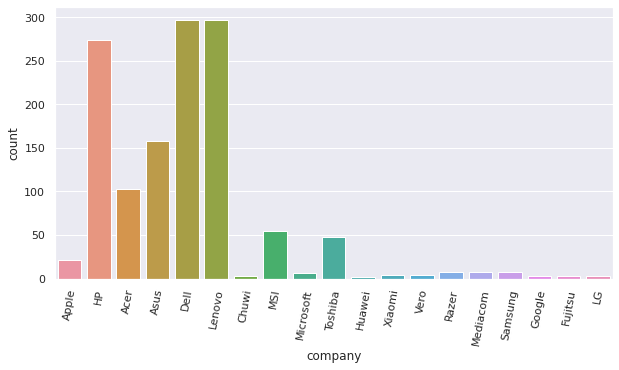

In [54]:
ig, ax  = plt.subplots(figsize=(10,5))
ax=sns.countplot(x='company', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)

In [55]:
df['company'].value_counts(ascending=True)

Huawei         2
Google         3
Fujitsu        3
LG             3
Chuwi          3
Xiaomi         4
Vero           4
Microsoft      6
Mediacom       7
Razer          7
Samsung        8
Apple         21
Toshiba       48
MSI           54
Acer         103
Asus         158
HP           274
Lenovo       297
Dell         297
Name: company, dtype: int64

[Text(0, 0, 'Ultrabook'),
 Text(0, 0, 'Notebook'),
 Text(0, 0, 'Netbook'),
 Text(0, 0, 'Gaming'),
 Text(0, 0, '2 in 1 Convertible'),
 Text(0, 0, 'Workstation')]

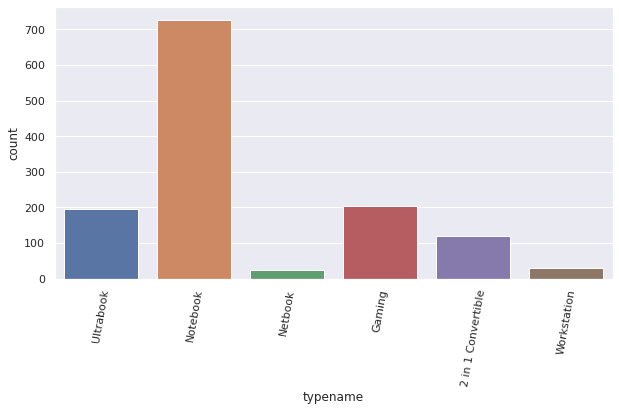

In [56]:
fig, ax  = plt.subplots(figsize=(10,5))
ax=sns.countplot(x='typename', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)

In [57]:
print('Most laptops are notebooks, which make {}% of the total laptops'.format(np.round(len(df[df['typename']=='Notebook'])*100/len(df),2)))

Most laptops are notebooks, which make 55.84% of the total laptops


[Text(0, 0, '10.1'),
 Text(0, 0, '11.3'),
 Text(0, 0, '11.6'),
 Text(0, 0, '12.0'),
 Text(0, 0, '12.3'),
 Text(0, 0, '12.5'),
 Text(0, 0, '13.0'),
 Text(0, 0, '13.3'),
 Text(0, 0, '13.5'),
 Text(0, 0, '13.9'),
 Text(0, 0, '14.0'),
 Text(0, 0, '14.1'),
 Text(0, 0, '15.0'),
 Text(0, 0, '15.4'),
 Text(0, 0, '15.6'),
 Text(0, 0, '17.0'),
 Text(0, 0, '17.3'),
 Text(0, 0, '18.4')]

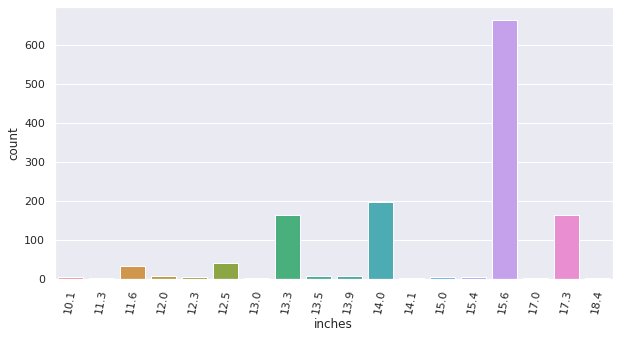

In [58]:
fig, ax  = plt.subplots(figsize=(10,5))
ax=sns.countplot(x='inches', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)

In [59]:
print('Most laptops have 15.6 inches, which make {}% of the total laptops'.format(np.round(len(df[df['inches']==15.6])*100/len(df),2)))

Most laptops have 15.6 inches, which make 51.08% of the total laptops


In [60]:
df['inches'].value_counts(ascending=True)

11.3      1
17.0      1
14.1      1
18.4      1
13.0      2
15.0      4
10.1      4
12.3      4
15.4      4
12.0      6
13.5      6
13.9      6
11.6     33
12.5     39
17.3    164
13.3    164
14.0    197
15.6    665
Name: inches, dtype: int64

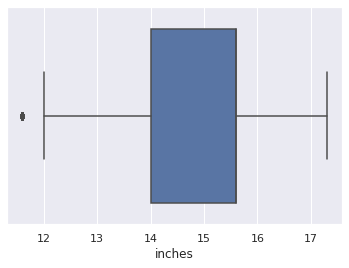

In [61]:
sns.boxplot(x='inches', data=df[(df['inches'] <=17.3) & (df['inches'] >= 11.6)])

In [62]:
df[(df['inches'] >17.3) | (df['inches'] < 11.6)].shape

(6, 20)

In [63]:
df_clean = df_clean.loc[(df['inches'] <=17.3) & (df['inches'] >= 11.6)]
print('We removed {} outliers!'.format(len(df)-len(df_clean)))

We removed 6 outliers!


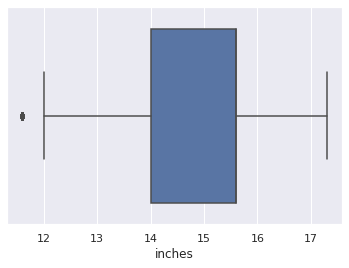

In [64]:
sns.boxplot(x='inches', data=df_clean)

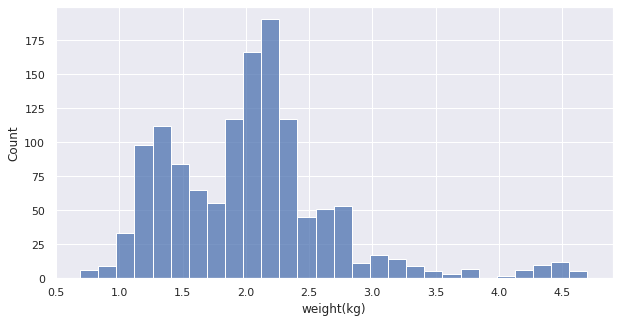

In [65]:
fig, ax  = plt.subplots(figsize=(10,5))
ax=sns.histplot(x='weight(kg)', data=df)

In [66]:
print('Average weight is: {} kg'.format(np.round(df['weight(kg)'].mean(),2)))
print('Median weight size is: {} kg'.format(df['weight(kg)'].median()))
print('Mode weight size is: {} kg'.format(df['weight(kg)'].mode()[0]))

Average weight is: 2.04 kg
Median weight size is: 2.04 kg
Mode weight size is: 2.2 kg


In [67]:
df.loc[df['weight(kg)'] > 3.5]['weight(kg)'].value_counts(ascending=True)

4.50     1
4.70     1
4.33     1
3.74     1
4.40     1
3.80     1
3.52     1
3.60     1
3.58     2
4.00     2
4.20     3
4.14     3
4.60     4
4.36     4
4.30     4
3.78     5
4.42    11
Name: weight(kg), dtype: int64

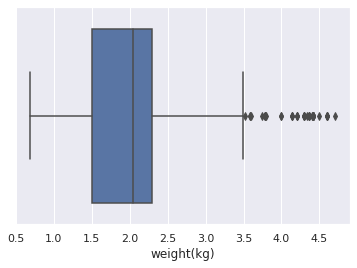

In [68]:
sns.boxplot(x='weight(kg)', data=df)

In [69]:
df_clean = df_clean.loc[df['weight(kg)'] < 3.5]
print('In total we removed {} outliers!'.format(len(df)-len(df_clean)))

In total we removed 51 outliers!


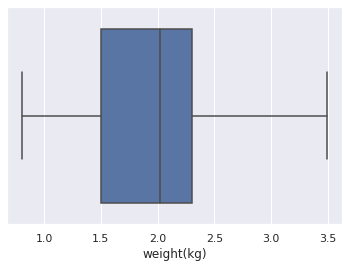

In [70]:
sns.boxplot(x='weight(kg)', data=df_clean)

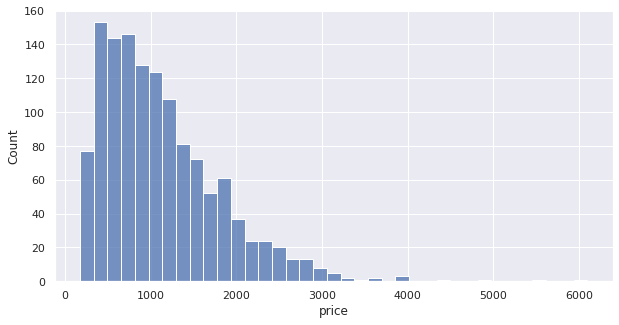

In [71]:
fig, ax  = plt.subplots(figsize=(10,5))
ax=sns.histplot(x='price', data=df)

In [72]:
print('Average price is: {} euros '.format(np.round(df['price'].mean(),2)))
print('Median price size is: {} euros '.format(df['price'].median()))
print('Mode price size is: {} euros '.format(df['price'].mode()[0]))

Average price is: 1124.04 euros 
Median price size is: 978.0 euros 
Mode price size is: 1099.0 euros 


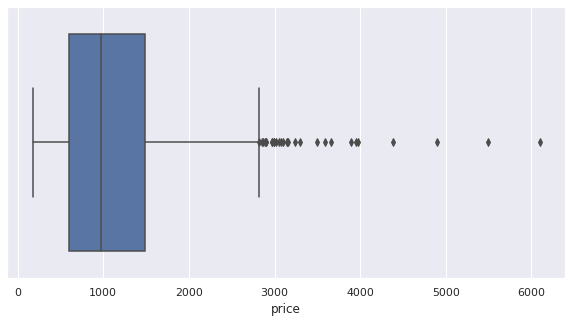

In [73]:
fig, ax  = plt.subplots(figsize=(10,5))
ax=sns.boxplot(x='price', data=df)

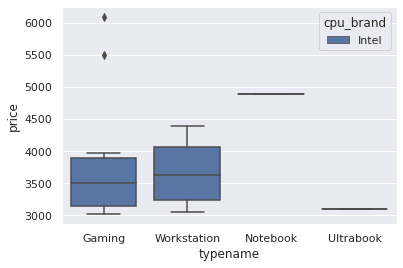

In [74]:
sns.boxplot(x='typename', y='price', data=df[df['price']>3000], hue='cpu_brand')

In [75]:
df[df['price']>4500]

,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(kg),price,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand,gpu_brand
196,Razer,Blade Pro,Gaming,17.3,Intel Core i7 7820HK,32,Nvidia GeForce GTX 1080,Windows 10,3.49,6099.0,3840x2160,NaN,1.0,2.9,1000.0,SSD,0.0,NaN,Intel,Nvidia
610,Lenovo,Thinkpad P51,Notebook,15.6,Intel Xeon E3-1535M v6,32,Nvidia Quadro M2200M,Windows 10,2.50,4899.0,3840x2160,IPSPanel,0.0,3.1,1000.0,SSD,0.0,NaN,Intel,Nvidia
830,Razer,Blade Pro,Gaming,17.3,Intel Core i7 7820HK,32,Nvidia GeForce GTX 1080,Windows 10,3.49,5499.0,3840x2160,NaN,1.0,2.9,512.0,SSD,0.0,NaN,Intel,Nvidia


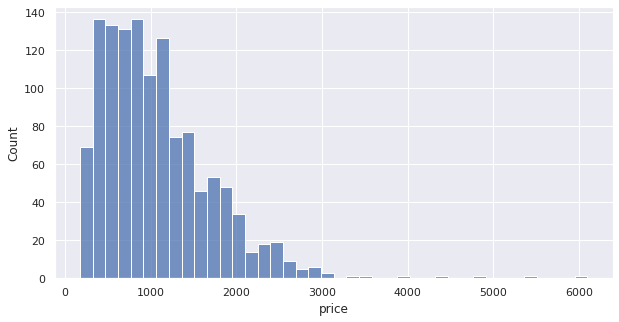

In [76]:
fig, ax  = plt.subplots(figsize=(10,5))
ax=sns.histplot(x='price', data=df_clean)

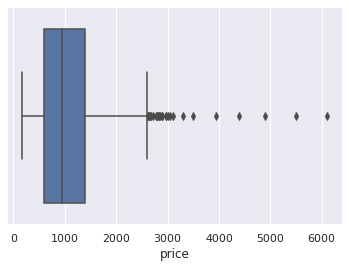

In [77]:
sns.boxplot(x='price', data=df_clean)

In [78]:
def iqr_fence(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - (1.5 * IQR)
    Upper_Fence = Q3 + (1.5 * IQR)
    u = max(x[x<Upper_Fence])
    l = min(x[x>Lower_Fence])
    print('Lower Fence:', l)
    print('Higher Fence:', u)
    return [u,l]
iqr_fence(df_clean['price'])

Lower Fence: 174.0
Higher Fence: 2599.0


[2599.0, 174.0]

In [79]:
df_clean[df_clean['price'] >2599]['price'].value_counts(ascending=True)

2858.00    1
3949.40    1
5499.00    1
4389.00    1
4899.00    1
6099.00    1
3499.00    1
2680.00    1
2620.00    1
3100.00    1
2649.00    1
2774.63    1
3299.00    1
2999.00    1
2799.00    1
2625.00    1
2712.00    1
2639.00    1
2884.86    1
3055.00    1
2824.00    1
2813.75    1
2968.00    2
2899.00    2
Name: price, dtype: int64

In [80]:
df_clean = df_clean.loc[df['price'] < 2599]
print('In total we removed {} outliers!'.format(len(df)-len(df_clean)))

In total we removed 78 outliers!


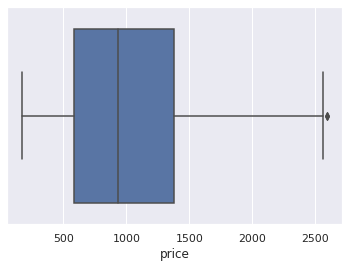

In [81]:
sns.boxplot(x='price', data=df_clean)

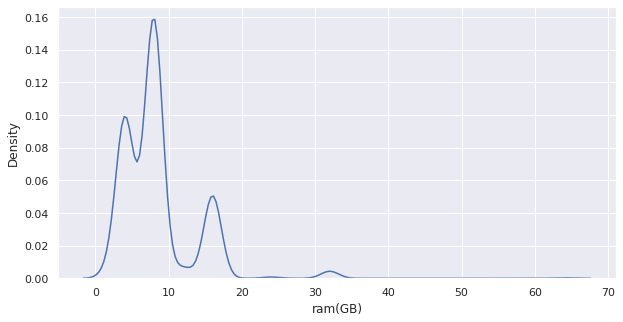

In [82]:
fig, ax  = plt.subplots(figsize=(10,5))
ax=sns.kdeplot(x='ram(GB)', data=df)

In [83]:
print('Most laptops have 8 GB RAM, which make {}% of the total laptops'.format(np.round(len(df[df['ram(GB)']==8])*100/len(df),2)))

Most laptops have 8 GB RAM, which make 47.54% of the total laptops


In [84]:
print('Average RAM is: {} GB '.format(np.round(df['ram(GB)'].mean(),2)))
print('Median RAM size is: {} GB '.format(df['ram(GB)'].median()))
print('Mode RAM size is: {} GB '.format(df['ram(GB)'].mode()[0]))

Average RAM is: 8.39 GB 
Median RAM size is: 8.0 GB 
Mode RAM size is: 8 GB 


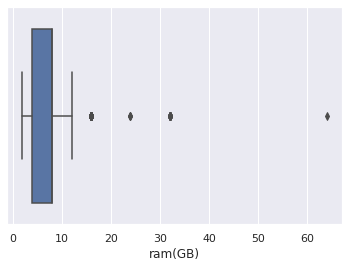

In [85]:
sns.boxplot(x='ram(GB)', data=df)

In [86]:
iqr_fence(df_clean['ram(GB)'])

Lower Fence: 2
Higher Fence: 12


[12, 2]

In [87]:
df_clean['ram(GB)'].value_counts(ascending=True)

24      1
2      22
12     23
6      41
16    156
4     370
8     611
Name: ram(GB), dtype: int64

In [88]:
df_clean = df_clean.loc[df_clean['ram(GB)']<=16]
print('In total we removed {} outliers!'.format(len(df)-len(df_clean)))

In total we removed 79 outliers!


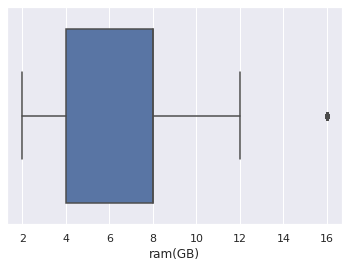

In [89]:
sns.boxplot(x='ram(GB)', data=df_clean)

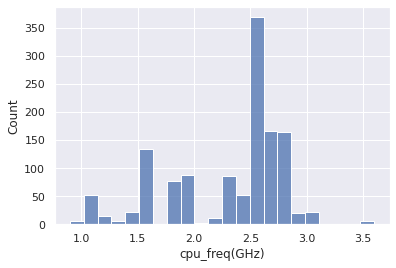

In [90]:
sns.histplot(x='cpu_freq(GHz)', data=df)

In [91]:
print('Average CPU frequency is: {} GHz '.format(np.round(df['cpu_freq(GHz)'].mean(),2)))
print('Median RAM size is: {} GHz '.format(df['cpu_freq(GHz)'].median()))
print('Mode RAM size is: {} GHz '.format(df['cpu_freq(GHz)'].mode()[0]))

Average CPU frequency is: 2.3 GHz 
Median RAM size is: 2.5 GHz 
Mode RAM size is: 2.5 GHz 


In [92]:
print('Most laptops have 2.5 GHz CPU, which make {}% of the total laptops'.format(np.round(len(df[df['cpu_freq(GHz)']==2.5])*100/len(df),2)))

Most laptops have 2.5 GHz CPU, which make 22.5% of the total laptops


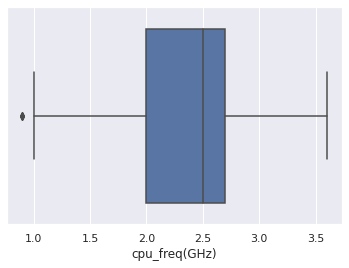

In [93]:
sns.boxplot(x='cpu_freq(GHz)', data=df)

In [94]:
df.loc[df['cpu_freq(GHz)']<1]

,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(kg),price,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand,gpu_brand
697,Asus,Chromebook Flip,2 in 1 Convertible,12.5,Intel Core M M3-6Y30,4,Intel HD Graphics 515,Chrome OS,1.2,669.0,1920x1080,NaN,1.0,0.9,64.0,FlashStorage,0.0,NaN,Intel,Intel
1261,Asus,ZenBook UX305CA-UBM1,Ultrabook,13.3,Intel Core M 6Y30,8,Intel HD Graphics 515,Windows 10,1.2,729.0,1920x1080,IPSPanel,0.0,0.9,512.0,SSD,0.0,NaN,Intel,Intel
1275,Asus,ZenBook UX305CA-UBM1,Ultrabook,13.3,Intel Core M 6Y30,8,Intel HD Graphics 515,Windows 10,1.2,729.0,1920x1080,IPSPanel,0.0,0.9,512.0,SSD,0.0,NaN,Intel,Intel
1289,Asus,ZenBook UX305CA-UBM1,Ultrabook,13.3,Intel Core M 6Y30,8,Intel HD Graphics 515,Windows 10,1.2,729.0,1920x1080,IPSPanel,0.0,0.9,512.0,SSD,0.0,NaN,Intel,Intel


In [95]:
df_clean = df_clean.loc[df_clean['cpu_freq(GHz)']>=1]
print('In total we removed {} outliers!'.format(len(df)-len(df_clean)))

In total we removed 83 outliers!


Text(0.5, 0, 'First Hard Drive memory storage (GB)')

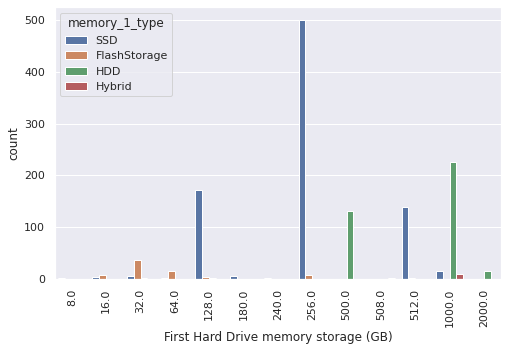

In [96]:
fig, ax  = plt.subplots(figsize=(8,5))
ax=sns.countplot(x='memory_1_sto(GB)', data=df, hue='memory_1_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_xlabel('First Hard Drive memory storage (GB)')

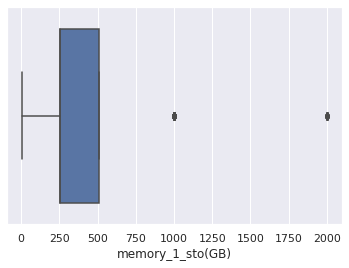

In [97]:
sns.boxplot(x='memory_1_sto(GB)', data=df)

In [98]:
df.loc[df['memory_1_sto(GB)']> 750]['memory_1_sto(GB)'].value_counts()

1000.0    250
2000.0     16
Name: memory_1_sto(GB), dtype: int64

In [99]:
df_clean = df_clean.loc[df_clean['memory_1_sto(GB)'] <= 1000]
print('In total we removed {} outliers!'.format(len(df)-len(df_clean)))

In total we removed 99 outliers!


Text(0.5, 0, 'Second Hard Drive memory storage (GB)')

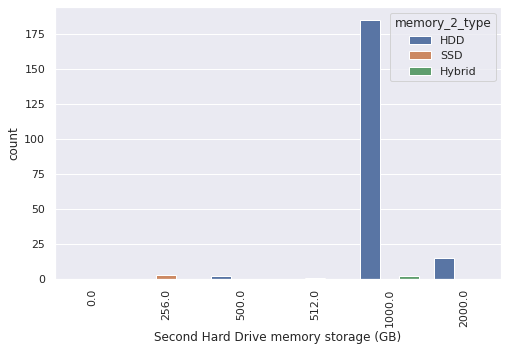

In [100]:
fig, ax  = plt.subplots(figsize=(8,5))
ax=sns.countplot(x='memory_2_sto(GB)', data=df, hue='memory_2_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_xlabel('Second Hard Drive memory storage (GB)')

In [101]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1203 entries, 0 to 1302
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1203 non-null   object 
 1   product           1203 non-null   object 
 2   typename          1203 non-null   object 
 3   inches            1203 non-null   float64
 4   cpu               1203 non-null   object 
 5   ram(GB)           1203 non-null   int64  
 6   gpu               1203 non-null   object 
 7   opsys             1203 non-null   object 
 8   weight(kg)        1203 non-null   float64
 9   price             1203 non-null   float64
 10  resolution        1203 non-null   object 
 11  screentype        310 non-null    object 
 12  touchscreen       1203 non-null   float64
 13  cpu_freq(GHz)     1203 non-null   float64
 14  memory_1_sto(GB)  1203 non-null   float64
 15  memory_1_type     1203 non-null   object 
 16  memory_2_sto(GB)  1203 non-null   float64


In [102]:
df_clean.head()


,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(kg),price,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand,gpu_brand
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,128.0,SSD,0.0,NaN,Intel,Intel
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,NaN,0.0,1.8,128.0,FlashStorage,0.0,NaN,Intel,Intel
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,NaN,0.0,2.5,256.0,SSD,0.0,NaN,Intel,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,512.0,SSD,0.0,NaN,Intel,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,256.0,SSD,0.0,NaN,Intel,Intel


Text(0.5, 1.0, 'Price vs CPU_freq')

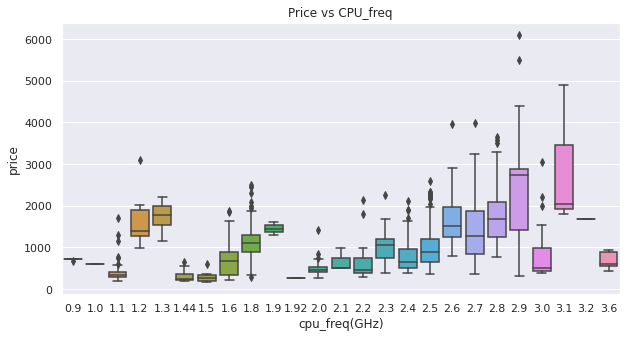

In [103]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x='cpu_freq(GHz)', y='price', data=df)
ax.set_title('Price vs CPU_freq')

In [104]:
df[df['cpu_freq(GHz)']>3.5]

,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(kg),price,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand,gpu_brand
341,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,AMD A12-Series 9720P,12,AMD Radeon 530,Windows 10,2.2,899.00,1920x1080,NaN,0.0,3.6,2000.0,HDD,0.0,NaN,AMD,AMD
591,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,AMD A12-Series 9720P,12,AMD Radeon 530,Windows 10,2.2,949.00,1920x1080,NaN,0.0,3.6,512.0,SSD,0.0,NaN,AMD,AMD
702,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,AMD A12-Series 9720P,8,AMD Radeon R7,Windows 10,2.2,429.00,1366x768,NaN,0.0,3.6,1000.0,HDD,0.0,NaN,AMD,AMD
982,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,AMD A12-Series 9720P,6,AMD Radeon 530,Windows 10,2.2,549.00,1920x1080,NaN,0.0,3.6,256.0,SSD,0.0,NaN,AMD,AMD
1240,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,AMD A12-Series 9720P,6,AMD Radeon 530,Windows 10,2.2,597.57,1920x1080,NaN,0.0,3.6,256.0,SSD,0.0,NaN,AMD,AMD


Text(0.5, 1.0, 'Price vs CPU brand by GPU brand')

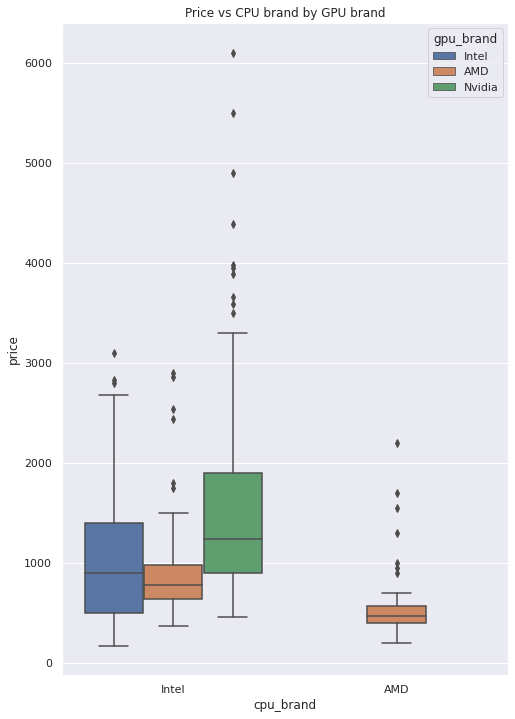

In [105]:
fig, ax = plt.subplots(figsize=(8,12))
sns.boxplot(x='cpu_brand', y='price', data=df, hue='gpu_brand')
ax.set_title('Price vs CPU brand by GPU brand')

Text(0.5, 1.0, 'CPU_freq vs CPU brand by GPU brand')

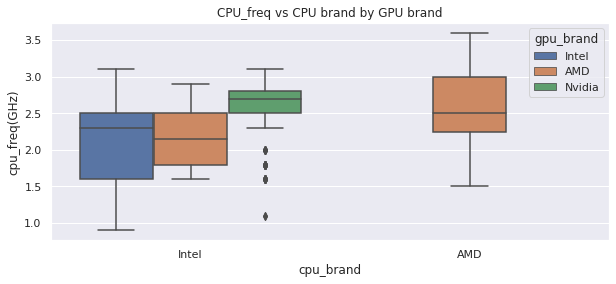

In [106]:
fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(x='cpu_brand', y='cpu_freq(GHz)', data=df, hue='gpu_brand')
ax.set_title('CPU_freq vs CPU brand by GPU brand')

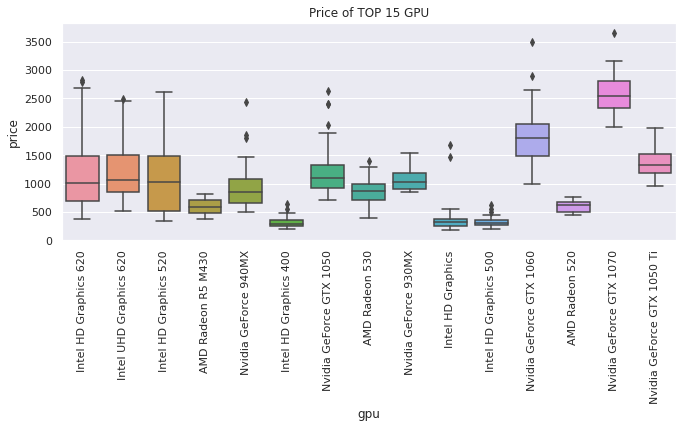

In [107]:
fig, ax = plt.subplots(figsize=(11,4))
sns.boxplot(x='gpu', y='price', data=df[df['gpu'].isin(df['gpu'].value_counts()[:15].index)])
ax.set_title('Price of TOP 15 GPU')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

[Text(0, 0, 'Intel Core i5 7200U '),
 Text(0, 0, 'Intel Core i7 8550U '),
 Text(0, 0, 'Intel Core i5 8250U '),
 Text(0, 0, 'Intel Core i3 6006U '),
 Text(0, 0, 'Intel Core i7 7500U '),
 Text(0, 0, 'Intel Core i3 7100U '),
 Text(0, 0, 'Intel Core i5 7300HQ '),
 Text(0, 0, 'Intel Celeron Dual Core N3350 '),
 Text(0, 0, 'Intel Core i7 7700HQ '),
 Text(0, 0, 'Intel Pentium Quad Core N4200 '),
 Text(0, 0, 'Intel Celeron Dual Core N3060 '),
 Text(0, 0, 'Intel Core i5 6200U '),
 Text(0, 0, 'Intel Core i7 6500U '),
 Text(0, 0, 'Intel Core i7 6600U '),
 Text(0, 0, 'Intel Core i7 6700HQ ')]

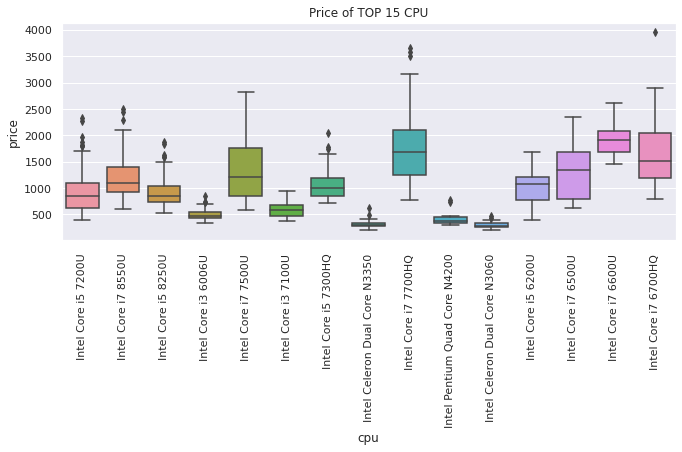

In [108]:
fig, ax = plt.subplots(figsize=(11,4))
sns.boxplot(x='cpu', y='price', data=df[df['cpu'].isin(df['cpu'].value_counts()[:15].index)])
ax.set_title('Price of TOP 15 CPU')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, 'Apple'),
 Text(0, 0, 'HP'),
 Text(0, 0, 'Acer'),
 Text(0, 0, 'Asus'),
 Text(0, 0, 'Dell'),
 Text(0, 0, 'Lenovo'),
 Text(0, 0, 'Chuwi'),
 Text(0, 0, 'MSI'),
 Text(0, 0, 'Microsoft'),
 Text(0, 0, 'Toshiba'),
 Text(0, 0, 'Huawei'),
 Text(0, 0, 'Xiaomi'),
 Text(0, 0, 'Vero'),
 Text(0, 0, 'Razer'),
 Text(0, 0, 'Mediacom'),
 Text(0, 0, 'Samsung'),
 Text(0, 0, 'Google'),
 Text(0, 0, 'Fujitsu'),
 Text(0, 0, 'LG')]

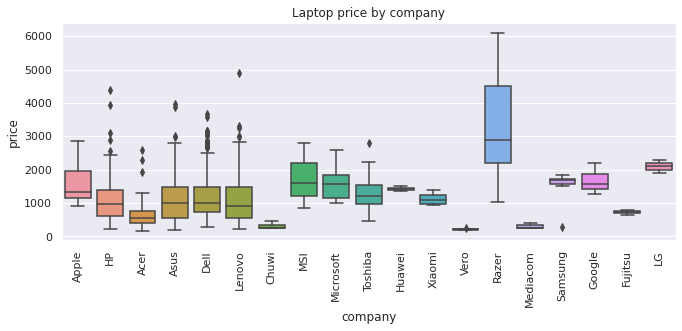

In [109]:
fig, ax = plt.subplots(figsize=(11,4))
sns.boxplot(x='company', y='price', data=df)
ax.set_title('Laptop price by company')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Text(0.5, 1.0, 'Correlation Matrix')

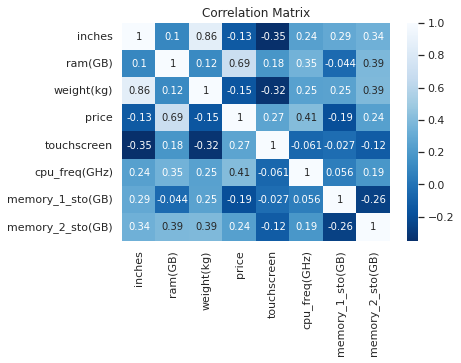

In [110]:
sns.heatmap(df_clean.corr(), cmap='Blues_r', annot=True)
plt.title('Correlation Matrix')

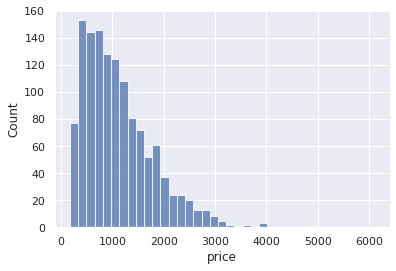

In [111]:
sns.histplot(x='price', data=df)

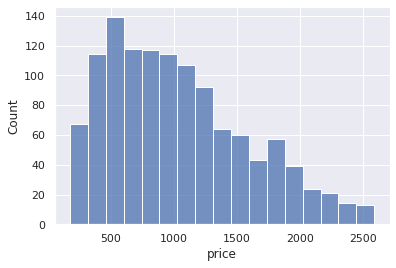

In [112]:
sns.histplot(x='price', data=df_clean)

In [113]:
df1=df_clean.copy()

In [114]:
df1['price']=np.log(df1['price'])
df1=df1.fillna('NaN')

In [115]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
catCols =  ['company','product','typename','cpu','gpu','opsys','resolution','screentype','resolution','memory_1_type','memory_2_type','gpu_brand','cpu_brand']
for cols in catCols:
    df1[cols] = en.fit_transform(df1[cols])
print('Dataframe encoded by OHE dimension : ', pd.get_dummies(df1, columns=catCols, drop_first=True).shape)

Dataframe encoded by OHE dimension :  (1203, 820)


In [117]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [118]:
X=df1.drop('price', axis = 1).values
y=df1['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 69)
scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler()
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)   

In [119]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=100, max_features=15)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features=15, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [120]:
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("RMSE using RF: ", np.sqrt(mse_rf))

RMSE using RF:  0.1666018930927349


In [121]:
print("RF R2 score :", r2_score(y_test,y_pred_rf))

RF R2 score : 0.9148726508269085


In [122]:
feature_name_list=df1.drop('price', axis = 1).columns

Text(0.5, 0, 'Feature Importance (%)')

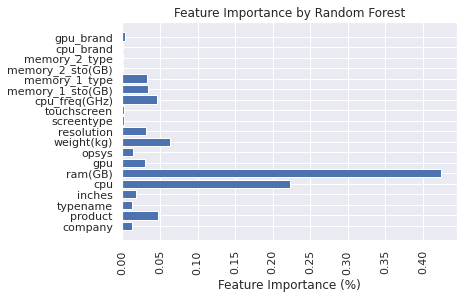

In [123]:
rf.feature_names = feature_name_list
plt.barh(rf.feature_names,rf.feature_importances_)
plt.xticks(rotation=90);
plt.title('Feature Importance by Random Forest')
plt.xlabel('Feature Importance (%)')

In [124]:
#XGBoost
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=400, learning_rate=0.24, max_depth=3)
xgb.fit(X_train, y_train) 
y_pred_xgb = xgb.predict(X_test) 
mse_xgb = mean_squared_error(y_pred_xgb, y_test)
print("RMSE:" , np.sqrt(mse_xgb)) 
print("XGBoost R2 score :", r2_score(y_test,y_pred_xgb))

[13:12:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.1509831356616114
XGBoost R2 score : 0.93008568172116


In [125]:
xgb.feature_names = feature_name_list

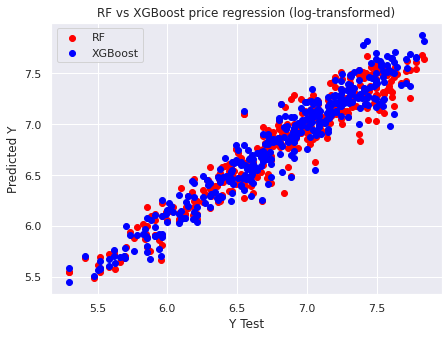

In [127]:
#Results Summary
plt.figure(figsize = (7,5))
plt.scatter(y_test, y_pred_rf, label='RF', color='red')
plt.scatter(y_test, y_pred_xgb, label='XGBoost', color='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('RF vs XGBoost price regression (log-transformed)')
plt.legend(loc='upper left')

In [128]:
print("RMSE using RF: ", np.sqrt(mse_rf))
print("RMSE using XGBoost: ", np.sqrt(mse_xgb))

RMSE using RF:  0.1666018930927349
RMSE using XGBoost:  0.1509831356616114


In [129]:
print("R2 using Random Forest: ",  r2_score(y_test, y_pred_rf))
print("R2 using XGBoost: ",  r2_score(y_test, y_pred_xgb))

R2 using Random Forest:  0.9148726508269085
R2 using XGBoost:  0.93008568172116


Text(0.5, 0, 'Feature Importance (%)')

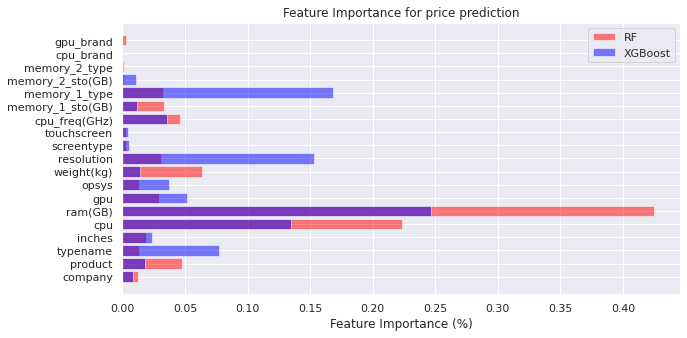

In [131]:
plt.figure(figsize=(10,5))
plt.barh(rf.feature_names,rf.feature_importances_, alpha=0.5, label='RF', color='red')
plt.barh(xgb.feature_names,xgb.feature_importances_, alpha=0.5, label='XGBoost', color='blue')
plt.legend(loc='upper right');
plt.title('Feature Importance for price prediction')
plt.xlabel('Feature Importance (%)')